In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
from scipy import stats
%matplotlib inline

# 1.Загрузить файл hr.csv.

In [3]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

Выведем информацию о датасете:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пустых значений нет - все хорошо.

Можно рассчитать основные статистики для каждой переменной:

In [34]:
statistics.mean(df['satisfaction_level'])

0.6128335222348157

In [33]:
statistics.median(df['satisfaction_level'])

0.64

In [35]:
statistics.mode(df['satisfaction_level'])

0.1

In [36]:
min(df['satisfaction_level'])

0.09

In [37]:
max(df['satisfaction_level'])

1.0

In [38]:
statistics.pstdev(df['satisfaction_level'])

0.2486223626820733

Но это долго. Поэтому воспользуемся волшебным методом describe:

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Моду найдем для переменых с типом "object":

In [8]:
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


То есть больше всего людей работает в департаменте продаж, низкий уровень зарплат превалирует над средний и высоким, 
инымы словами, большинство сотрудников имеют низкий уровень заработной платы.


Хотя можно найти и для всех переменных:

In [42]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level,department_number
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low,1.0,1.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

Добавим "численные" эквиваленты для столбцов "sales" и "salary":

In [13]:
def salary_level(a):
    """уровень зарплаты"""
    if a == 'low':
        return 1
    if a == 'medium':
        return 2
    if a == 'high':
        return 3
    
    return False

In [14]:
df['salary_level'] = df['salary'].apply(salary_level)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [15]:
def department_number(a):
    """номер департамента"""
    if a == 'sales':
        return 1
    if a == 'technical':
        return 2
    if a == 'support':
        return 3
    if a == 'IT':
        return 4
    if a == 'product_mng':
        return 5
    if a == 'marketing':
        return 6
    if a == 'RandD':
        return 7
    if a == 'accounting':
        return 8
    if a == 'hr':
        return 9
    if a == 'management':
        return 10
        
    return False

In [16]:
df['department_number'] = df['sales'].apply(department_number)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level,department_number
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1


In [18]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level,department_number
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,-0.008430
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.004741
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,-0.008138
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,-0.008511
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,0.043883
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,0.003402
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,-0.028394
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,0.072657
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,0.102711
department_number,-0.008430,0.004741,-0.008138,-0.008511,0.043883,0.003402,-0.028394,0.072657,0.102711,1.000000


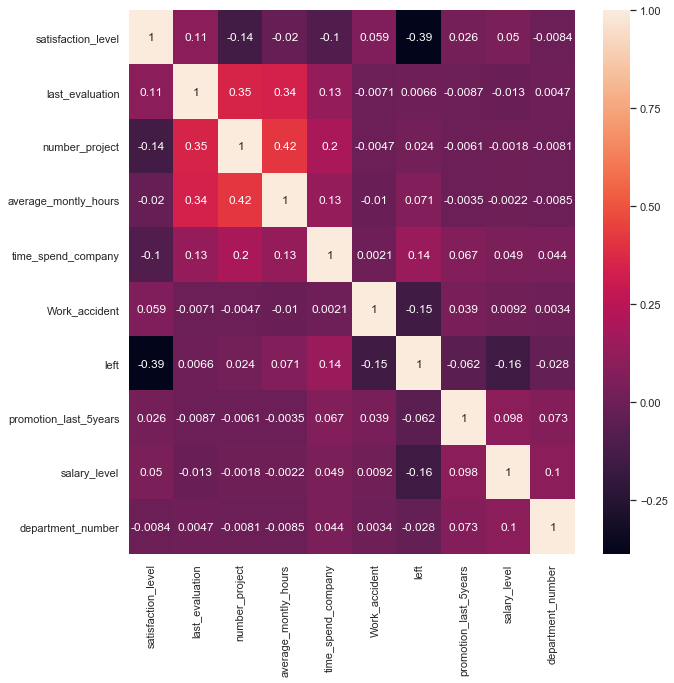

In [19]:
sns.set(rc=({'figure.figsize':(10, 10)}))
sns.heatmap(corr_matrix, annot=True)

В целом между переменными наблюдается очень слабая корреляция. Пожалуй, можно выделить небольшую отрицательную связь между уровнем удовлетворенности и количеством увольнений: удовлетворенность снижает количество увольнений.

# 4.Визуализировать несколько взаимосвязей между переменными.

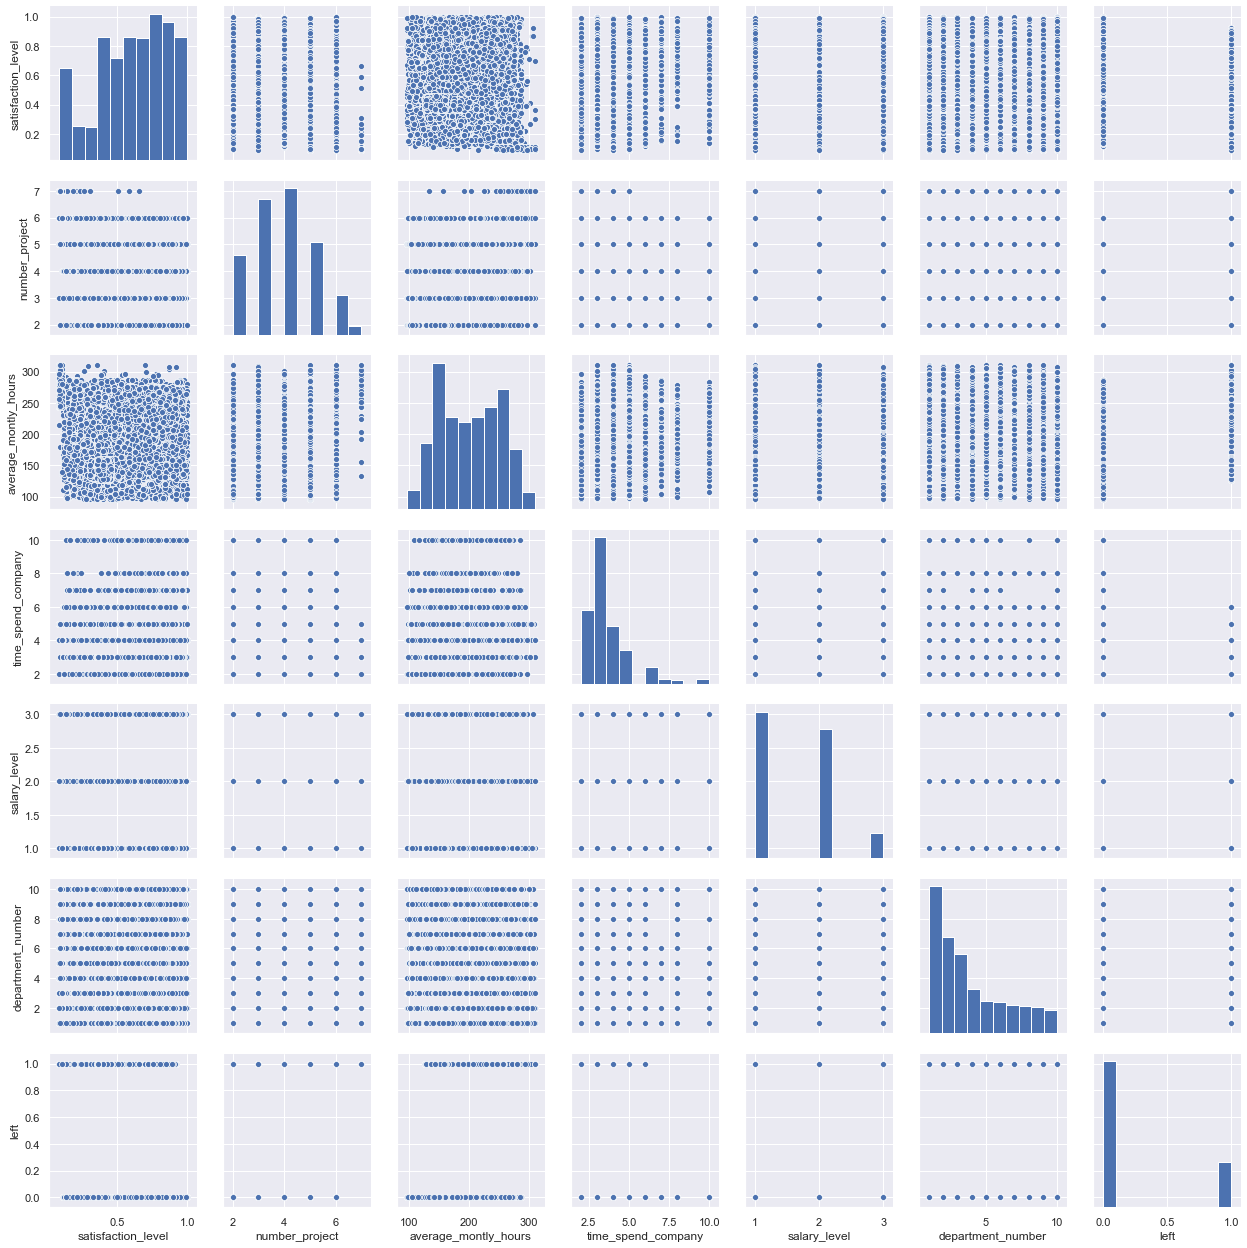

In [96]:
sns.pairplot(df, vars=['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company','salary_level','department_number', 'left'], kind="scatter")
#sns.pairplot(df)

Между переменными нет видимой взаимосвязи.

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


In [47]:
print(stats.ttest_ind(df['number_project'], df['average_montly_hours']))
print(stats.ttest_ind(df['satisfaction_level'], df['salary_level']))
print(stats.ttest_ind(df['satisfaction_level'], df['department_number']))

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-175.8115102805405, pvalue=0.0)
Ttest_indResult(statistic=-136.48996489332634, pvalue=0.0)


# 6.Рассчитать, сколько работников работает в каждом департаменте.

In [55]:
df['sales'].value_counts()   

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам.

In [107]:
# Найдем количество сотрдуников по уровню заработной платы
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [115]:
# Найдем доли по уровням заработной платы
df2 = df['salary'].value_counts(1)
df2

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

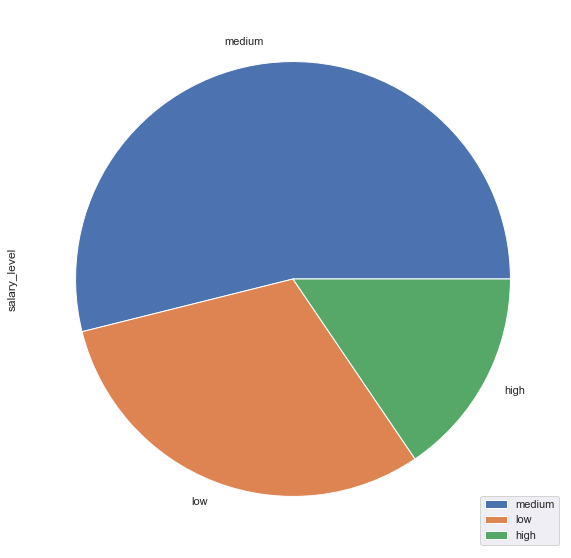

In [23]:
# построим график
salary_dynamics = df.groupby(['salary']).sum().sort_values(by='salary_level', ascending=False).head(5)
salary_dynamics.plot(kind='pie', y='salary_level')

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

Воспользуемся сводной таблицей:

In [26]:
df2 = df.pivot_table(index = 'sales', columns = 'salary', values = 'salary_level', aggfunc = 'count', fill_value = 0)
df2

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


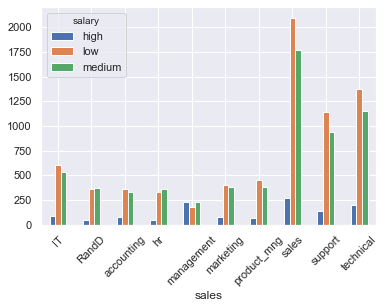

In [40]:
df2.plot(kind='bar', rot=45)

# 9.Сколько сотрудников покинули компанию.

In [105]:
df['left'].value_counts()  

0    11428
1     3571
Name: left, dtype: int64

Компанию покинул 3571 сотрудник.

Можно посмотреть по департаментам:

In [48]:
top_sales_left = df.groupby('sales')[['left']].sum()\
    .sort_values('left', ascending=False).head(10)
top_sales_left.style.bar()

,left
sales,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

1. Уровень зарплаты не связан с увольнением 

In [92]:
stay = df[df['left']==0]['salary_level']
left = df[df['left']==1]['salary_level']
len(stay), len(left)

(11428, 3571)

In [93]:
stay = stay.sample(n=3571)
left = left.sample(n=3571)

In [94]:
statistics.variance(stay), statistics.variance(left)

(0.43143890992409284, 0.2887353541248479)

In [95]:
sts.ttest_ind(stay, left, equal_var = False)

Ttest_indResult(statistic=16.445698604170207, pvalue=1.2284111779341717e-59)

Высокий показатель t-value=16.4 и низкий показатель p-value<0.05 говорит о том, что группы статистически значимы.
Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что уровень зарплаты не связан с увольнением.

2. Количество проектов не связано с увольнениями

In [97]:
stay = df[df['left']==0]['number_project']
left = df[df['left']==1]['number_project']
len(stay), len(left)

(11428, 3571)

In [98]:
stay = stay.sample(n=3571)
left = left.sample(n=3571)

In [99]:
statistics.variance(stay), statistics.variance(left)

(0.9296298300894147, 3.305725314488719)

In [100]:
sts.ttest_ind(stay, left, equal_var = False)

Ttest_indResult(statistic=-2.309290125592885, pvalue=0.02096483014240228)

Так как результат p-value меньше 0.05, то мы отвергаем нулевую гипотезу о том, что количество проектов не связано с увольнением.